# Decision tree: pathological example

In [1]:
# Imports needed for the script
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import accuracy_score
from subprocess import check_call
 
# Simulated data
x_train = np.array(np.meshgrid(np.arange(0,100), np.arange(0,100))).T.reshape(-1,2)
y_train = np.where(x_train[:,0] + x_train[:,1] <= 100, 0, 1) 

[]

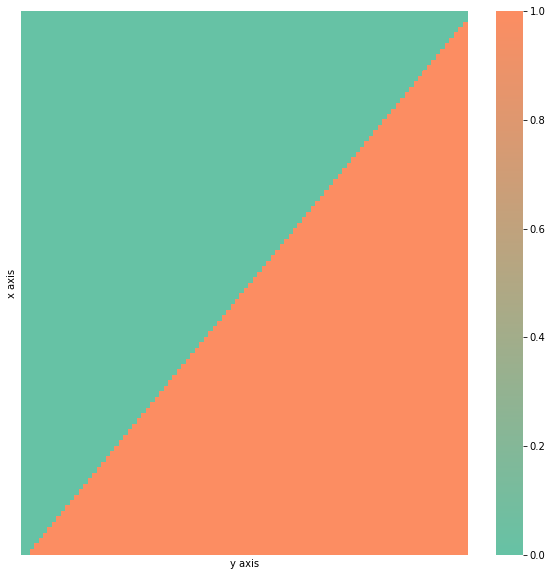

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

train_xy = pd.DataFrame(np.c_[ x_train, y_train ])
train_xy.columns = ['x', 'y', 'value']
train_xy = train_xy.pivot("x", "y")

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom',
    colors=['#66c2a5','#fc8d62'],
)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(train_xy, cmap=custom_color_map)
ax.set_ylabel('x axis')    
ax.set_xlabel('y axis')
ax.set_yticks([])
ax.set_xticks([])

In [3]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Export our trained model as a .dot file
with open("simulated.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              #max_depth = 3,
                              impurity = True,
                              feature_names = ['x', 'y'],
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True)
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','-Gdpi=300','simulated.dot','-o','simulated.png'])

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

## Decision tree visualised

![](simulated.png?3)